In [2]:
%%HTML
<style>
    body {
        --vscode-font-family: "ComicSansMS"
    }
</style>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
def predict_sales(radio, weight, bias):
    return weight*radio + bias

Lets use MSE (l2) as our cost function

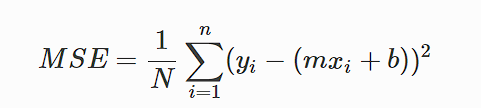

In [5]:
def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error // companies

Gradient gives the directio of max steep,move in opposite direction to get to the local minima

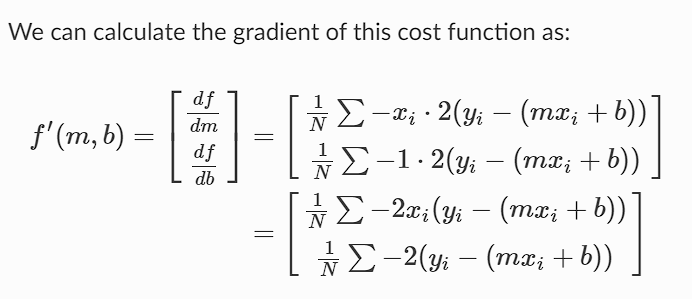

Above is a convex cost function which will give global minima but this isn't the case for non convex cost function having many local minima.the way to find minimum cost/global minima of the cost function is to try with different initial parameter assumptions.One may for sure lead to global minima of the cost function or very close to it.

A very important first step is feature extraction.It is method/process of transforming raw data to a format that is suitable for modelling.This includes cleaning data--->removing outliners and null values, removing features/variables that have least impact on prediction , taking care of depnedent variables /featature (ie. combining those features)(multicollinearity),Noramlization(ensuring features are on the same scale so that one feature don't dominate the other,scaling them to standard 0 to 1 range) and scaling.
Gradient descent is sensitive to the initial conditions and the choice of hyperparameters, such as the learning rate, making it susceptible to converging to a local minimum rather than the global minimum.
To address these challenges, practitioners often use strategies like random initialization, trying multiple initializations, and tuning the learning rate. Additionally, more advanced optimization algorithms or techniques like stochastic gradient descent with momentum or adaptive learning rates (e.g., Adam optimizer) are employed to enhance the chances of finding good solutions.
 Many optimization problems, especially those with non-convex and high-dimensional landscapes, are known to be NP-hard or NP-complete, making it computationally infeasible to guarantee global optimality in polynomial time.

In [6]:
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)

    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv // companies) * learning_rate
    bias -= (bias_deriv // companies) * learning_rate

    return weight, bias

Also,traning data needs to be normalized before use

we'll use Rsqured no test data to find the accuracy of our model

In [21]:
from sklearn import preprocessing
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)

    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv ) * learning_rate
    bias -= (bias_deriv ) * learning_rate

    return weight, bias
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)
        print ("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias
#there are better ways to extract values from csv files 
#but here i am dealing with list for my ease of use

data=pd.read_csv('advertising.csv')
x=list(data['TV'])
y=list(data['Sales'])
x= list(preprocessing.normalize([x])[0])
y= list(preprocessing.normalize([y])[0])

print(x)
xtr,ytr=[],[]
for i in range(int(.8*len(x))):xtr.append(x[i]);ytr.append(y[i])
xts,yts=[],[]
for i in range(len(x)-1,int(.8*len(x)),-1):xts.append(x[i]);yts.append(y[i])
w,b=train(xtr,ytr,2,1,.01,10)

#lets test the accuracy now
import math
def ouput(x):
    return w*x+b

def test():
    #we are using Rsquared on testing data to find out accuracy of our model
    err=0
    y_mean=sum(yts)//len(yts)
    for i in range(len(xts)):
        err+=(ouput(xts[i])-yts[i])**2
    deno=0
    for i in range(len(xts)):
        deno+=(y_mean-yts[i])**2
    print('err',err)
    print('deno',deno)

    print('accuracy is ',(1-(err//deno))*100)

# test()


[0.09561706240078915, 0.01849178303709308, 0.007147385803101145, 0.06295517146336183, 0.07513066006980738, 0.003615247470173253, 0.023893876958041616, 0.04994859148446265, 0.0035736929015505723, 0.0830260281081168, 0.027467569859592186, 0.08921765883289626, 0.009889987332198097, 0.04051570440711405, 0.08481287455889207, 0.08119762708871882, 0.028173997526177767, 0.11693455610422454, 0.028755761486895303, 0.06120987958120923, 0.09075517787193547, 0.09865054591024487, 0.005485203058193901, 0.09486908016558089, 0.025888496251930307, 0.10924696090902854, 0.05938147856181126, 0.09977251926305726, 0.10338776673323052, 0.029337525447612835, 0.12171333149583285, 0.046915107975006934, 0.04039104070124601, 0.11036893426184094, 0.03976772217190579, 0.12079913098613387, 0.11090914365393578, 0.031041262761142763, 0.017910019076375544, 0.09474441645971285, 0.08414800146092917, 0.0735515864621455, 0.12200421347619164, 0.08597640248032715, 0.01043019672429295, 0.07276204965831456, 0.037274448054544926